In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

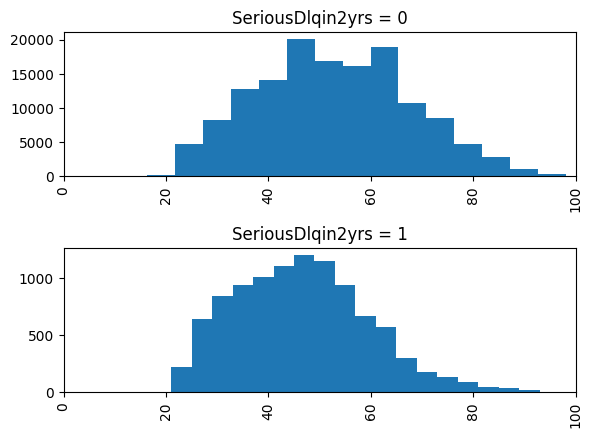

In [3]:
age_hist = df['age'].hist(by=df['SeriousDlqin2yrs'], bins=20, layout=(2,1))
age_hist[0].set_xlim((0,100))
age_hist[0].set_title('SeriousDlqin2yrs = 0')
age_hist[1].set_xlim((0,100))
age_hist[1].set_title('SeriousDlqin2yrs = 1')


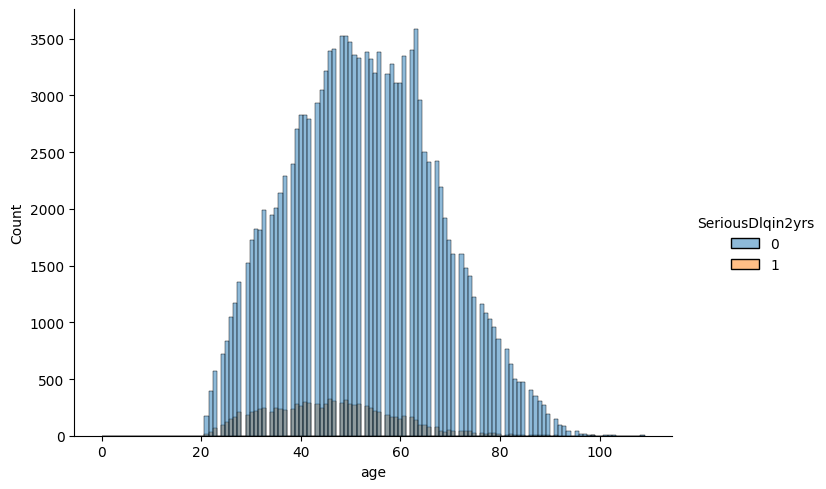

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x='age', hue="SeriousDlqin2yrs", height=5, aspect=1.4) 
plt.show()

In [5]:
del df["Unnamed: 0"]

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
len(df), len(df.dropna())

(150000, 120269)

In [8]:
df["SeriousDlqin2yrs"].unique()

array([1, 0])

In [10]:
target = "MonthlyIncome"
pred = [
    "RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"
]

df = df[pred + [target]]
df.dropna(inplace=True)
corr = df.corr()

<Axes: >

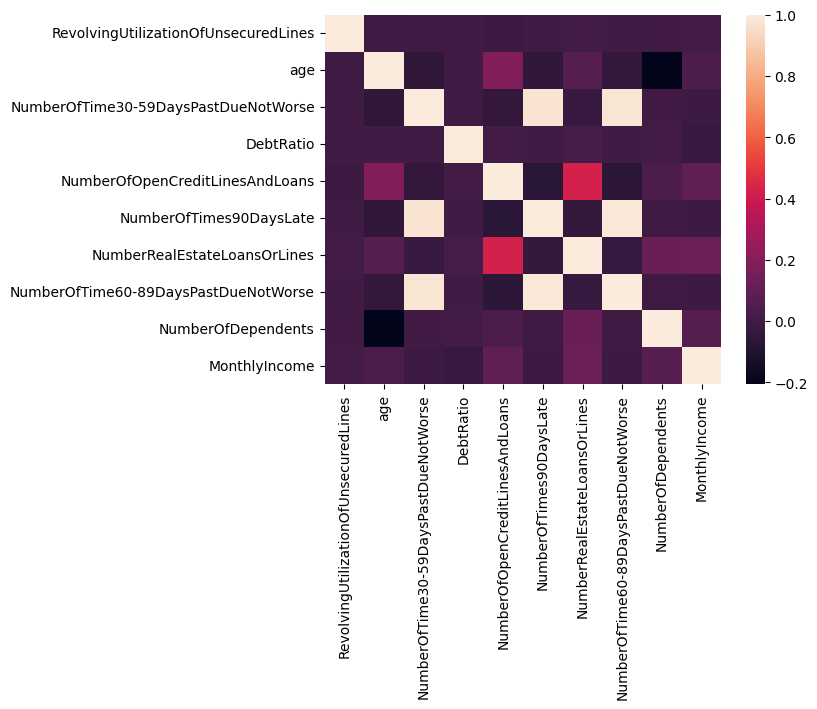

In [11]:
sns.heatmap(corr)

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [14]:
pred

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [16]:
X,y = df[pred], df[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1), test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [21]:
from sklearn.metrics import r2_score

In [22]:
models = [
    RandomForestRegressor(),
    XGBRegressor()
]

model_params = [
    {
        'regressor__n_estimators': [10, 15, 20, 50, 75, 100, 150],
        'regressor__max_depth': [5, 6, 7, 9, 10]
    },
    {
        'regressor__n_estimators': [10, 15, 20, 50, 75, 100, 150],
        'regressor__max_depth': [5, 6, 7, 9, 10]

    }
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), pred)
    ]
)

best_reg = None
best_score = 0

for reg, params in zip(models, model_params):

    pipeline = Pipeline(
        steps=[
            ('pre', preprocessor),
            ('regressor', reg)
        ]
    )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    cur_score = r2_score(grid.best_estimator_.predict(X_val), y_val)
    print(cur_score)
    if cur_score > best_score:
        best_reg = grid.best_estimator_


-1.0431079872542024
-0.2361821074794066
